In [1]:
# List of packages
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import os, uuid
#import azureml.core

from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__
from azureml.core import Workspace, Dataset, Datastore

import random

import albumentations as A

import segmentation_models as sm

from P8_01_GenerateurData_class import GenerateurData
from P8_01_GenerateurDatasasansaug_class import GenerateurDatasansaug

import warnings
warnings.filterwarnings("ignore")

Segmentation Models: using `tf.keras` framework.


Using TensorFlow backend.


In [2]:
print(tf.keras.__version__)

2.5.0


In [3]:
import azureml.core
print(azureml.core.VERSION)

1.28.0


In [4]:
print(tf.version.VERSION)

2.5.0


# Données images

In [5]:
train = os.listdir('./Dtrain/')

In [6]:
train

['aachen_000000_000019_leftImg8bit.png',
 'aachen_000001_000019_leftImg8bit.png',
 'aachen_000002_000019_leftImg8bit.png',
 'aachen_000003_000019_leftImg8bit.png',
 'aachen_000004_000019_leftImg8bit.png',
 'aachen_000005_000019_leftImg8bit.png',
 'aachen_000006_000019_leftImg8bit.png',
 'aachen_000007_000019_leftImg8bit.png',
 'aachen_000008_000019_leftImg8bit.png',
 'aachen_000009_000019_leftImg8bit.png',
 'aachen_000010_000019_leftImg8bit.png',
 'aachen_000011_000019_leftImg8bit.png',
 'aachen_000012_000019_leftImg8bit.png',
 'aachen_000013_000019_leftImg8bit.png',
 'aachen_000014_000019_leftImg8bit.png',
 'aachen_000015_000019_leftImg8bit.png',
 'aachen_000016_000019_leftImg8bit.png',
 'aachen_000017_000019_leftImg8bit.png',
 'aachen_000018_000019_leftImg8bit.png',
 'aachen_000019_000019_leftImg8bit.png',
 'aachen_000020_000019_leftImg8bit.png',
 'aachen_000021_000019_leftImg8bit.png',
 'aachen_000022_000019_leftImg8bit.png',
 'aachen_000023_000019_leftImg8bit.png',
 'aachen_000024_

In [7]:
len(train)

2975

In [8]:
trainLabel = os.listdir('./DtrainLabel/')

In [9]:
trainLabel

['aachen_000000_000019_gtFine_labelIds.png',
 'aachen_000001_000019_gtFine_labelIds.png',
 'aachen_000002_000019_gtFine_labelIds.png',
 'aachen_000003_000019_gtFine_labelIds.png',
 'aachen_000004_000019_gtFine_labelIds.png',
 'aachen_000005_000019_gtFine_labelIds.png',
 'aachen_000006_000019_gtFine_labelIds.png',
 'aachen_000007_000019_gtFine_labelIds.png',
 'aachen_000008_000019_gtFine_labelIds.png',
 'aachen_000009_000019_gtFine_labelIds.png',
 'aachen_000010_000019_gtFine_labelIds.png',
 'aachen_000011_000019_gtFine_labelIds.png',
 'aachen_000012_000019_gtFine_labelIds.png',
 'aachen_000013_000019_gtFine_labelIds.png',
 'aachen_000014_000019_gtFine_labelIds.png',
 'aachen_000015_000019_gtFine_labelIds.png',
 'aachen_000016_000019_gtFine_labelIds.png',
 'aachen_000017_000019_gtFine_labelIds.png',
 'aachen_000018_000019_gtFine_labelIds.png',
 'aachen_000019_000019_gtFine_labelIds.png',
 'aachen_000020_000019_gtFine_labelIds.png',
 'aachen_000021_000019_gtFine_labelIds.png',
 'aachen_0

In [10]:
len(trainLabel)

2975

In [11]:
val = os.listdir('./Dval/')

In [12]:
val

['frankfurt_000000_000294_leftImg8bit.png',
 'frankfurt_000000_000576_leftImg8bit.png',
 'frankfurt_000000_001016_leftImg8bit.png',
 'frankfurt_000000_001236_leftImg8bit.png',
 'frankfurt_000000_001751_leftImg8bit.png',
 'frankfurt_000000_002196_leftImg8bit.png',
 'frankfurt_000000_002963_leftImg8bit.png',
 'frankfurt_000000_003025_leftImg8bit.png',
 'frankfurt_000000_003357_leftImg8bit.png',
 'frankfurt_000000_003920_leftImg8bit.png',
 'frankfurt_000000_004617_leftImg8bit.png',
 'frankfurt_000000_005543_leftImg8bit.png',
 'frankfurt_000000_005898_leftImg8bit.png',
 'frankfurt_000000_006589_leftImg8bit.png',
 'frankfurt_000000_007365_leftImg8bit.png',
 'frankfurt_000000_008206_leftImg8bit.png',
 'frankfurt_000000_008451_leftImg8bit.png',
 'frankfurt_000000_009291_leftImg8bit.png',
 'frankfurt_000000_009561_leftImg8bit.png',
 'frankfurt_000000_009688_leftImg8bit.png',
 'frankfurt_000000_009969_leftImg8bit.png',
 'frankfurt_000000_010351_leftImg8bit.png',
 'frankfurt_000000_010763_leftIm

In [13]:
len(val)

500

In [14]:
valLabel = os.listdir('./DvalLabel/')

In [15]:
valLabel

['frankfurt_000000_000294_gtFine_labelIds.png',
 'frankfurt_000000_000576_gtFine_labelIds.png',
 'frankfurt_000000_001016_gtFine_labelIds.png',
 'frankfurt_000000_001236_gtFine_labelIds.png',
 'frankfurt_000000_001751_gtFine_labelIds.png',
 'frankfurt_000000_002196_gtFine_labelIds.png',
 'frankfurt_000000_002963_gtFine_labelIds.png',
 'frankfurt_000000_003025_gtFine_labelIds.png',
 'frankfurt_000000_003357_gtFine_labelIds.png',
 'frankfurt_000000_003920_gtFine_labelIds.png',
 'frankfurt_000000_004617_gtFine_labelIds.png',
 'frankfurt_000000_005543_gtFine_labelIds.png',
 'frankfurt_000000_005898_gtFine_labelIds.png',
 'frankfurt_000000_006589_gtFine_labelIds.png',
 'frankfurt_000000_007365_gtFine_labelIds.png',
 'frankfurt_000000_008206_gtFine_labelIds.png',
 'frankfurt_000000_008451_gtFine_labelIds.png',
 'frankfurt_000000_009291_gtFine_labelIds.png',
 'frankfurt_000000_009561_gtFine_labelIds.png',
 'frankfurt_000000_009688_gtFine_labelIds.png',
 'frankfurt_000000_009969_gtFine_labelId

In [16]:
len(valLabel)

500

In [17]:
trainColor = os.listdir('./DtrainColor/')

In [18]:
trainColor

['aachen_000000_000019_gtFine_color.png',
 'aachen_000001_000019_gtFine_color.png',
 'aachen_000002_000019_gtFine_color.png',
 'aachen_000003_000019_gtFine_color.png',
 'aachen_000004_000019_gtFine_color.png',
 'aachen_000005_000019_gtFine_color.png',
 'aachen_000006_000019_gtFine_color.png',
 'aachen_000007_000019_gtFine_color.png',
 'aachen_000008_000019_gtFine_color.png',
 'aachen_000009_000019_gtFine_color.png',
 'aachen_000010_000019_gtFine_color.png',
 'aachen_000011_000019_gtFine_color.png',
 'aachen_000012_000019_gtFine_color.png',
 'aachen_000013_000019_gtFine_color.png',
 'aachen_000014_000019_gtFine_color.png',
 'aachen_000015_000019_gtFine_color.png',
 'aachen_000016_000019_gtFine_color.png',
 'aachen_000017_000019_gtFine_color.png',
 'aachen_000018_000019_gtFine_color.png',
 'aachen_000019_000019_gtFine_color.png',
 'aachen_000020_000019_gtFine_color.png',
 'aachen_000021_000019_gtFine_color.png',
 'aachen_000022_000019_gtFine_color.png',
 'aachen_000023_000019_gtFine_colo

In [19]:
len(trainColor)

2975

In [20]:
valColor = os.listdir('./DvalColor/')

In [21]:
valColor

['frankfurt_000000_000294_gtFine_color.png',
 'frankfurt_000000_000576_gtFine_color.png',
 'frankfurt_000000_001016_gtFine_color.png',
 'frankfurt_000000_001236_gtFine_color.png',
 'frankfurt_000000_001751_gtFine_color.png',
 'frankfurt_000000_002196_gtFine_color.png',
 'frankfurt_000000_002963_gtFine_color.png',
 'frankfurt_000000_003025_gtFine_color.png',
 'frankfurt_000000_003357_gtFine_color.png',
 'frankfurt_000000_003920_gtFine_color.png',
 'frankfurt_000000_004617_gtFine_color.png',
 'frankfurt_000000_005543_gtFine_color.png',
 'frankfurt_000000_005898_gtFine_color.png',
 'frankfurt_000000_006589_gtFine_color.png',
 'frankfurt_000000_007365_gtFine_color.png',
 'frankfurt_000000_008206_gtFine_color.png',
 'frankfurt_000000_008451_gtFine_color.png',
 'frankfurt_000000_009291_gtFine_color.png',
 'frankfurt_000000_009561_gtFine_color.png',
 'frankfurt_000000_009688_gtFine_color.png',
 'frankfurt_000000_009969_gtFine_color.png',
 'frankfurt_000000_010351_gtFine_color.png',
 'frankfur

In [22]:
len(valColor)

500

## Augmentation des données

In [23]:
def visu(transform_image, transform_mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(transform_image)
        ax[1].imshow(transform_mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(transform_image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(transform_mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

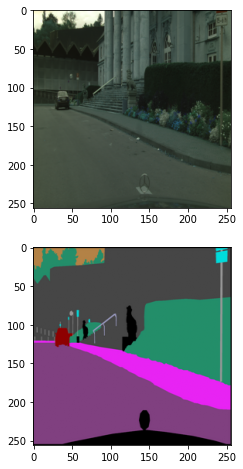

In [24]:
from skimage.transform import resize
#read image example
image = cv2.imread('./Dtrain/'+ train[7])
image = resize(image, (256, 256))
mask = cv2.imread('./DtrainColor/'+ trainColor[7])
mask = resize(mask, (256, 256))
visu(image, mask)

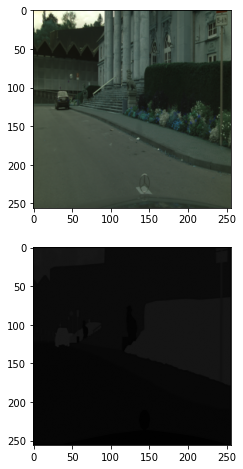

In [25]:
#read image example
image = cv2.imread('./Dtrain/'+ train[7])
image = resize(image, (256, 256))
maskLabel = cv2.imread('./DtrainLabel/'+ trainLabel[7])
maskLabel = resize(maskLabel, (256, 256))
visu(image, maskLabel)

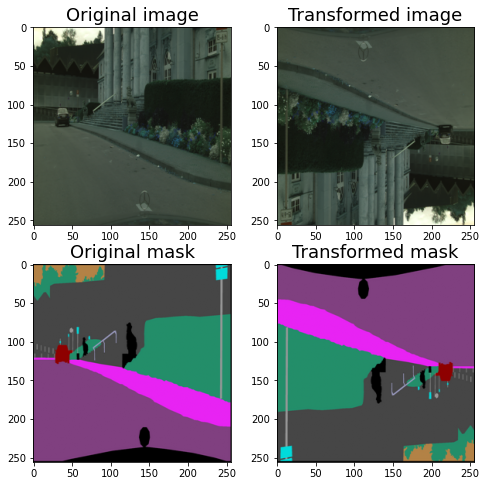

In [26]:
#random rotate
aug = A.RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visu(image_rot90, mask_rot90, original_image=image, original_mask=mask)

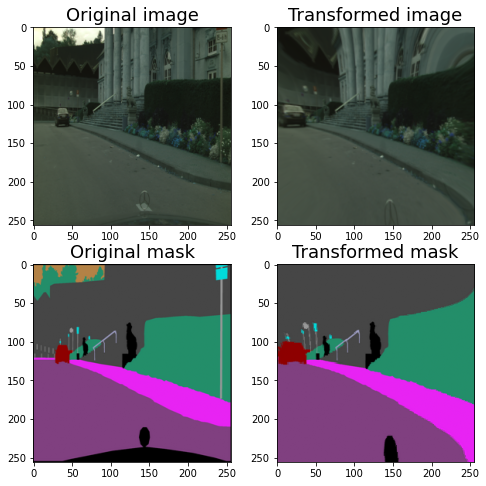

In [27]:
#optical distorsion
aug = A.OpticalDistortion(distort_limit=1, shift_limit=0.7, p=1)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visu(image_optical, mask_optical, original_image=image, original_mask=mask)

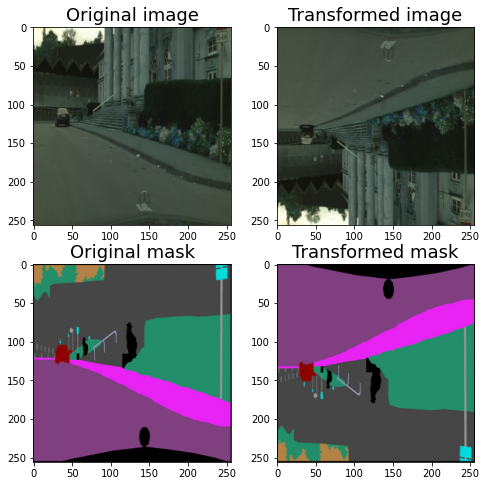

In [28]:
# Vertical flip
aug = A.VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visu(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)

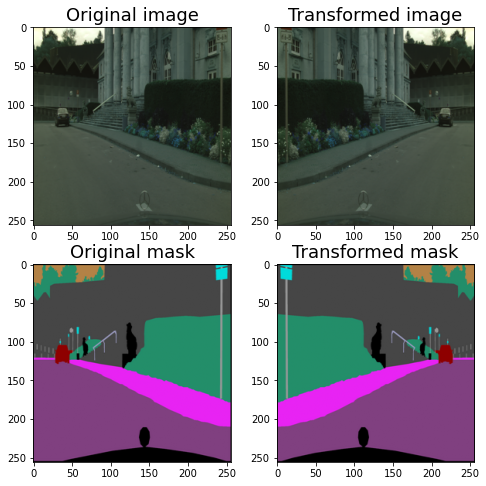

In [29]:
#horizontal flip
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visu(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

In [30]:
image.shape

(256, 256, 3)

In [31]:
mask.size

196608

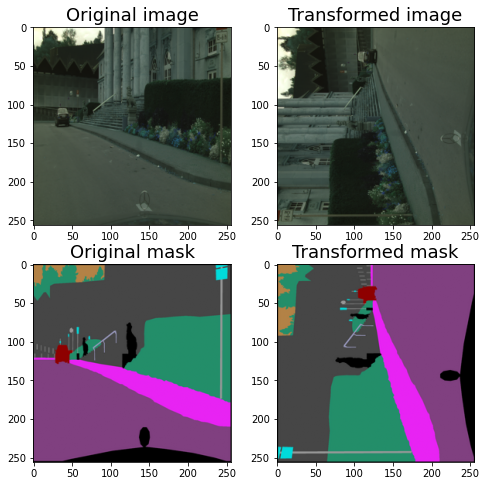

In [32]:
#Transpose
aug = A.Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visu(image_transposed, mask_transposed, original_image=image, original_mask=mask)

In [33]:
image_transposed.shape

(256, 256, 3)

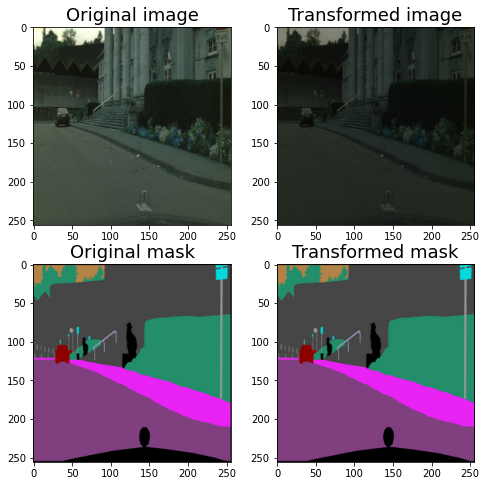

In [34]:
# random contrast
#optical distorsion
aug = A.RandomContrast(limit=0.7, p=1)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visu(image_optical, mask_optical, original_image=image, original_mask=mask)

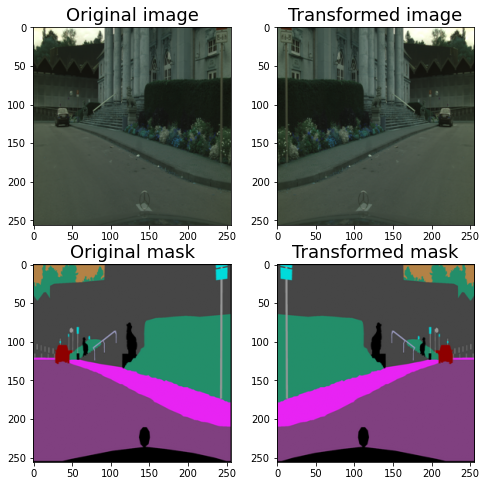

In [35]:
#combine different transformation
aug = A.Compose([
    A.HorizontalFlip(p=0.5),              
    A.OpticalDistortion(distort_limit=2, shift_limit=0.9, p=0.5),
    A.RandomContrast(limit=0.5, p=1)
    ]
)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_light = augmented['image']
mask_light = augmented['mask']

visu(image_light, mask_light, original_image=image, original_mask=mask)

## Générateur de données

In [36]:
# Parameters
param = {'prob': 0.5,
          'batch_size': 32,
          'n_classes':8,
          'shuffle': False
         }

In [37]:
# Generators
train_gene = GenerateurData('./Dtrain/', './DtrainLabel/', train, trainLabel, **param)

In [38]:
len(train_gene)

92

In [39]:
X, y = train_gene[92]

In [40]:
X[2].shape

(256, 256, 3)

In [41]:
y[2].shape

(256, 256, 8)

In [42]:
image = cv2.imread('./Dtrain/aachen_000000_000019_leftImg8bit.png')

In [43]:
mask.shape

(256, 256, 3)

In [44]:
image.shape

(256, 512, 3)

In [45]:
from skimage.transform import resize

image = resize(image, (256, 256))

In [46]:
image.shape

(256, 256, 3)

In [47]:
pil_img = tf.keras.preprocessing.image.array_to_img(X[0])
#mask = tf.keras.preprocessing.image.array_to_img(y[2])
#pil_img.show()

In [48]:
#pil_img.show()

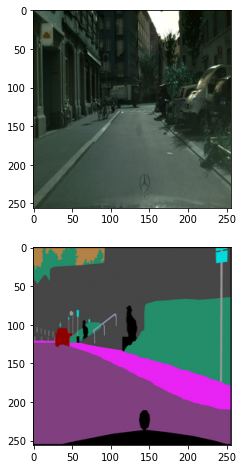

In [49]:
visu(pil_img, mask)

## Modèle de référence UNET

In [50]:
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 10

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

In [52]:
mode_autosave = ModelCheckpoint('./outputsl/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks = [mode_autosave, lr_reducer, early_stopping]

In [53]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 
#focal_loss = sm.losses.CategoricalFocalLoss()
#total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
model.compile(
    optim,
    loss=dice_loss,
    metrics=metrics,
)


In [54]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurData('./Dtrain/', './DtrainLabel/', train, trainLabel, 
                                   **param)
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurDatasansaug('./Dval/', './DvalLabel/',val, valLabel, 
                                     **param_val)

In [55]:
%%time
hist = model.fit_generator(train_gene, shuffle =True,
                  epochs=5, workers=8, use_multiprocessing=False,
                  validation_data = valid_gene, callbacks=callbacks,                    
                  verbose = 1)

Epoch 1/5
371/371 [==============================] - 2401s 6s/step - loss: 0.8794 - iou_score: 0.9302 - f1-score: 0.9311 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00001: val_iou_score improved from -inf to 1.00000, saving model to ./outputsl\checkpoint
Epoch 2/5
371/371 [==============================] - 2401s 6s/step - loss: 0.8750 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00002: val_iou_score did not improve from 1.00000
Epoch 3/5
371/371 [==============================] - 2400s 6s/step - loss: 0.8750 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00003: val_iou_score did not improve from 1.00000
Epoch 4/5
371/371 [==============================] - 2455s 7s/step - loss: 0.8750 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00004: val_iou_score did not impro

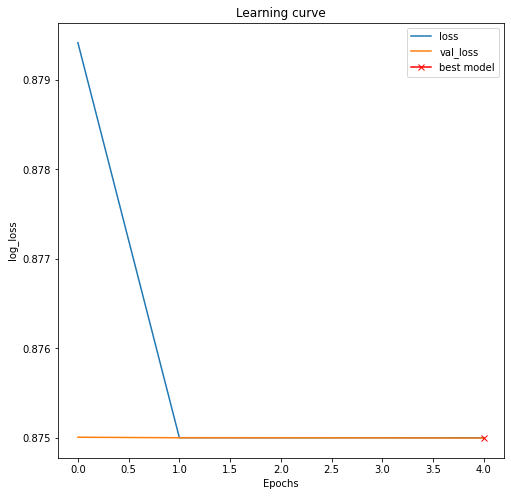

In [56]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(hist.history["val_loss"]), np.min(hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

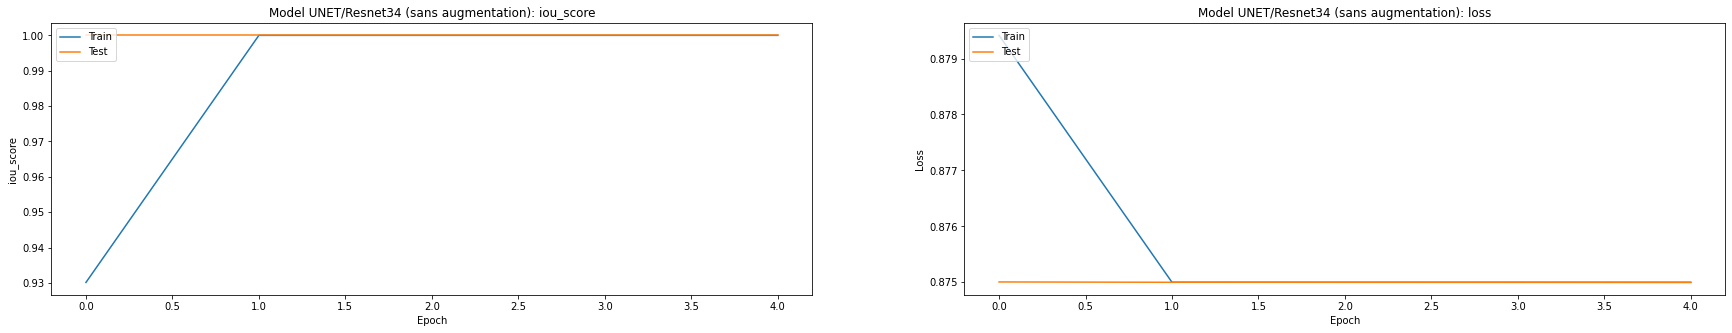

In [57]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hist.history['iou_score'])
plt.plot(hist.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (sans augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model UNET/Resnet34 (sans augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Modèle UNET Resnet

In [58]:
# pre-processing function
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [59]:
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 50

BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model2 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, 
                input_shape=(256,256,3), classes=8, activation=activation)

In [60]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [61]:
mode_autosave2 = ModelCheckpoint('./outputsl2/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer2 = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping2 = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks2 = [mode_autosave2, lr_reducer2, early_stopping2]

In [62]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)

model2.compile(
    optim,
    loss=dice_loss,
    metrics=metrics,
)


In [63]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurData('./Dtrain/', './DtrainLabel/', train, trainLabel, 
                                   **param, preprocessing=get_preprocessing(preprocess_input))
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurDatasansaug('./Dval/', './DvalLabel/',val, valLabel, 
                                     **param_val, preprocessing=get_preprocessing(preprocess_input))

In [64]:
%%time
his1 = model2.fit_generator(train_gene, shuffle =True,
                  epochs=5, workers=8, use_multiprocessing=False,
                  validation_data = valid_gene, callbacks=callbacks2,                    
                  verbose = 1)

Epoch 1/5
371/371 [==============================] - 1105s 3s/step - loss: 0.8772 - iou_score: 0.9881 - f1-score: 0.9888 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00001: val_iou_score improved from -inf to 1.00000, saving model to ./outputsl2\checkpoint
Epoch 2/5
371/371 [==============================] - 1087s 3s/step - loss: 0.8750 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00002: val_iou_score did not improve from 1.00000
Epoch 3/5
371/371 [==============================] - 1116s 3s/step - loss: 0.8750 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00003: val_iou_score did not improve from 1.00000
Epoch 4/5
371/371 [==============================] - 1156s 3s/step - loss: 0.8750 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.8750 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00004: val_iou_score did not impr

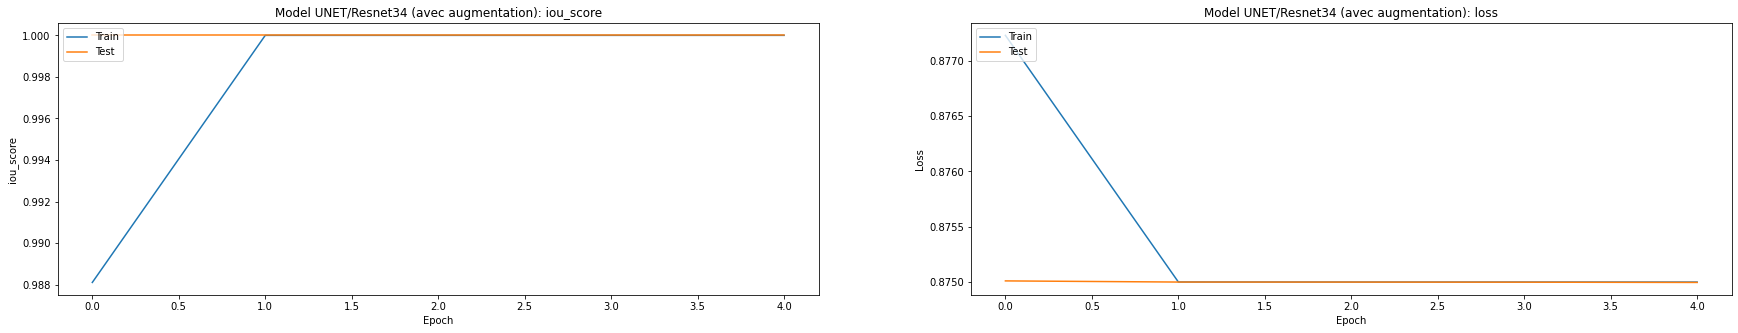

In [65]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(his1.history['iou_score'])
plt.plot(his1.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (avec augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(his1.history['loss'])
plt.plot(his1.history['val_loss'])
plt.title('Model UNET/Resnet34 (avec augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Modèle Unet avec Backbone:resnet34

## Avec augmentation, Backbone: resnet34 Modèle UNET

In [66]:
# pre-processing function
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [67]:
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 50

BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model4 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, 
                input_shape=(256,256,3), classes=8, activation=activation)

In [68]:
model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_34 (ZeroPadding2 (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d_34[0][0]          
____________________________________________________________________________________________

In [69]:
mode_autosave4 = ModelCheckpoint('./outputsl4/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer4 = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping4 = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks4 = [mode_autosave4, lr_reducer4, early_stopping4]

In [70]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)

model4.compile(
    optim,
    loss=cce,
    metrics=metrics,
)

In [71]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurData('./Dtrain/', './DtrainLabel/', train, trainLabel, 
                                   **param, preprocessing=get_preprocessing(preprocess_input))
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurDatasansaug('./Dval/', './DvalLabel/',val, valLabel, 
                                     **param_val, preprocessing=get_preprocessing(preprocess_input))

In [72]:
%%time
hist2 = model4.fit_generator(train_gene, shuffle =True,
                  epochs=5, workers=8, use_multiprocessing=False,
                  validation_data = valid_gene, callbacks=callbacks4,                    
                  verbose = 1)


Epoch 1/5
371/371 [==============================] - 1120s 3s/step - loss: 0.0851 - iou_score: 0.9805 - f1-score: 0.9807 - val_loss: 0.0025 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00001: val_iou_score improved from -inf to 1.00000, saving model to ./outputsl4\checkpoint
Epoch 2/5
371/371 [==============================] - 1104s 3s/step - loss: 0.0010 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 6.1915e-04 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00002: val_iou_score did not improve from 1.00000
Epoch 3/5
371/371 [==============================] - 1135s 3s/step - loss: 4.0326e-04 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 2.9071e-04 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00003: val_iou_score did not improve from 1.00000
Epoch 4/5
371/371 [==============================] - 1101s 3s/step - loss: 2.1613e-04 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 1.6609e-04 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00004: val_io

## Avec augmentation, Backbone: resnet34  Modèle UNET

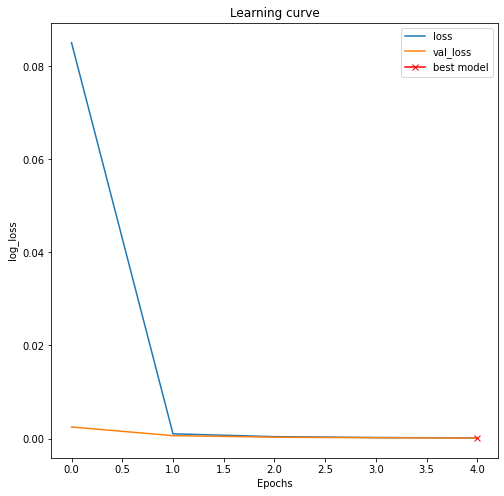

In [73]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(hist2.history["loss"], label="loss")
plt.plot(hist2.history["val_loss"], label="val_loss")
plt.plot( np.argmin(hist2.history["val_loss"]), np.min(hist2.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

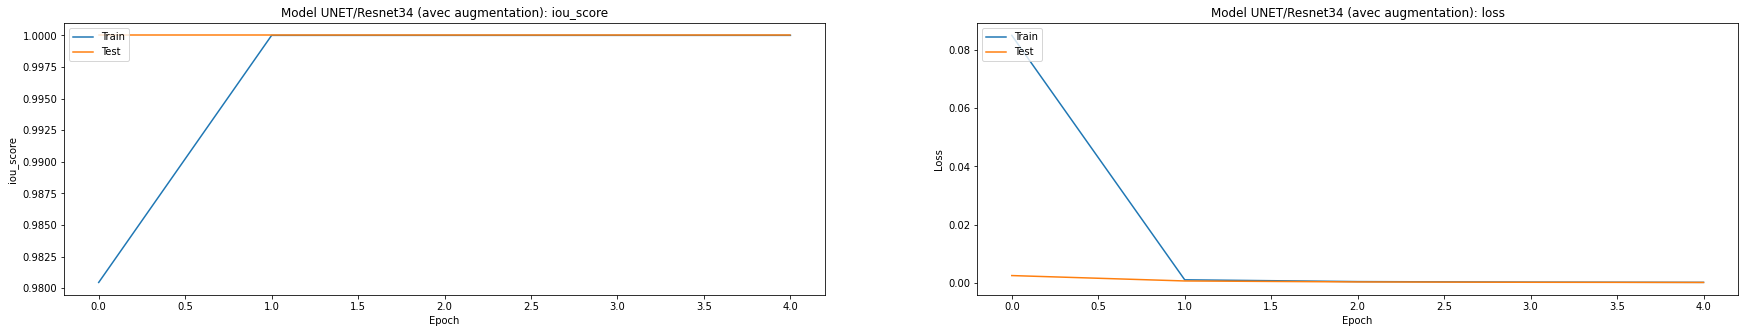

In [74]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hist2.history['iou_score'])
plt.plot(hist2.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (avec augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model UNET/Resnet34 (avec augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Sans augmentation, Backbone: resnet34 Modèle UNET

In [75]:
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 10

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model3 = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)

In [76]:
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [77]:
mode_autosave3 = ModelCheckpoint('./outputsl3/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer3 = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping3 = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks3 = [mode_autosave3, lr_reducer3, early_stopping3]

In [78]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)

model3.compile(
    optim,
    loss=cce,
    metrics=metrics,
)

In [79]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurDatasansaug('./Dtrain/', './DtrainLabel/', train, trainLabel, 
                                   **param)
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurDatasansaug('./Dval/', './DvalLabel/',val, valLabel, 
                                     **param_val)

In [80]:
%%time
hist3 = model3.fit_generator(train_gene, shuffle =True,
                  epochs=5, workers=8, use_multiprocessing=False,
                  validation_data = valid_gene, callbacks=callbacks3,                    
                  verbose = 1)


Epoch 1/5
371/371 [==============================] - 2485s 7s/step - loss: 0.1482 - iou_score: 0.9557 - f1-score: 0.9564 - val_loss: 0.0065 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00001: val_iou_score improved from -inf to 1.00000, saving model to ./outputsl3\checkpoint
Epoch 2/5
371/371 [==============================] - 2492s 7s/step - loss: 0.0012 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 5.3437e-04 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00002: val_iou_score did not improve from 1.00000
Epoch 3/5
371/371 [==============================] - 2479s 7s/step - loss: 4.9130e-04 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 8.4820e-04 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00003: val_iou_score did not improve from 1.00000
Epoch 4/5
371/371 [==============================] - 2426s 7s/step - loss: 2.6575e-04 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 1.7438e-04 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00004: val_io

## Sans augmentation,  Modèle UNET

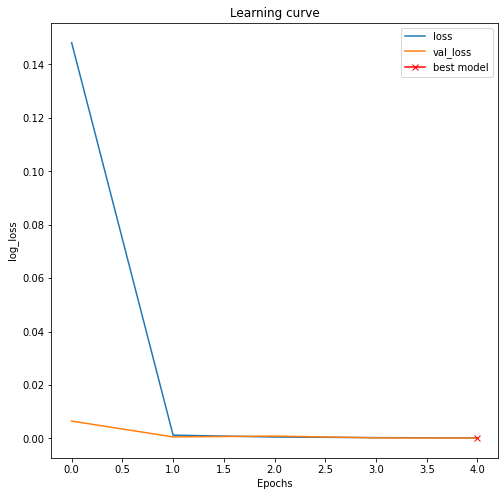

In [81]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(hist3.history["loss"], label="loss")
plt.plot(hist3.history["val_loss"], label="val_loss")
plt.plot( np.argmin(hist3.history["val_loss"]), np.min(hist3.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

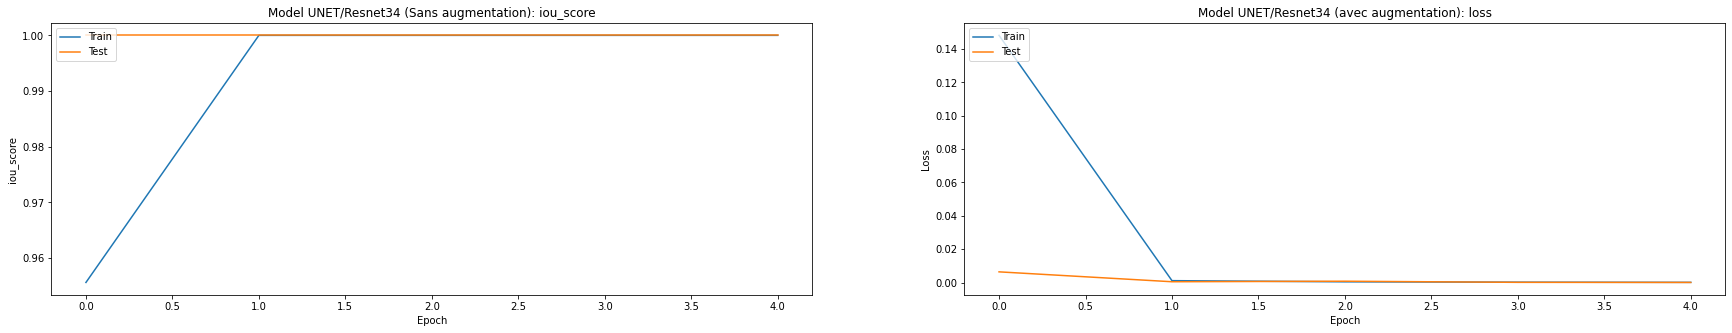

In [82]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hist3.history['iou_score'])
plt.plot(hist3.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (Sans augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model UNET/Resnet34 (avec augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualisation des résultats avec le dataset de test

In [83]:
# pre-processing function
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [85]:
BACKBONE = 'resnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 50

optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)


model_p = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, input_shape=(256,256,3), classes=8, activation=activation)
model_p.compile(optimizer=optim, loss=dice_loss, metrics=metrics)
model_p.load_weights('outputsl2/checkpoint')

In [86]:
BACKBONE = 'resnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 50


optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
#create model
model_p3 = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)
model_p3.compile(
    optim,
    loss=cce,
    metrics=metrics,
)
model_p3.load_weights('outputsl3/checkpoint')

In [87]:
BACKBONE = 'resnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 50


optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
#create model
model_p3s = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)
model_p3s.compile(
    optim,
    loss=cce,
    metrics=metrics,
)
#model_p3s.load_weights('outputsl3/checkpoint')

In [88]:
BACKBONE = 'resnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.1
EPOCHS = 50

optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
#create model
model_p4 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, 
                input_shape=(256,256,3), classes=8, activation=activation)
model_p4.compile(
    optim,
    loss=cce,
    metrics=metrics,
)

In [89]:
BACKBONE = 'resnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.001
EPOCHS = 50

optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)


model_p1 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, input_shape=(256,256,3), classes=8, activation=activation)
model_p1.compile(optimizer=optim, loss=dice_loss, metrics=metrics)

In [90]:
data_test = valid_gene

In [91]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x


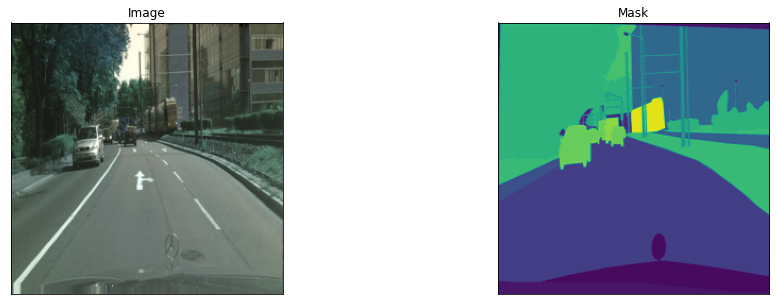

In [92]:
i = 13
image = cv2.imread('./Dval/' + val[i])
image = resize(image, (256, 256))
mask = cv2.imread('./DvalLabel/' + valLabel[i])
mask = resize(mask, (256, 256))
visualize(image=image, mask=mask[...,0])

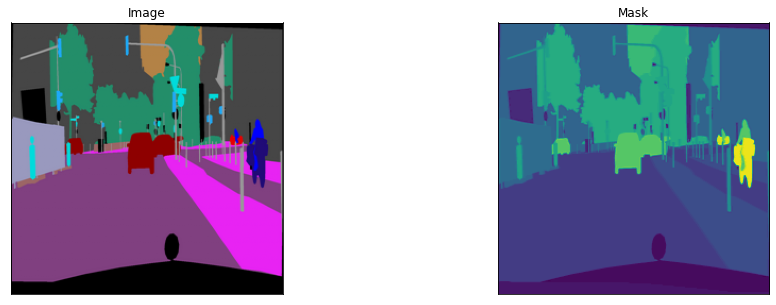

In [93]:
i = 33
image = cv2.imread('./DvalColor/' + valColor[i])
image = resize(image, (256, 256))
mask = cv2.imread('./DvalLabel/' + valLabel[i])
mask = resize(mask, (256, 256))
visualize(image=image, mask=mask[...,0])

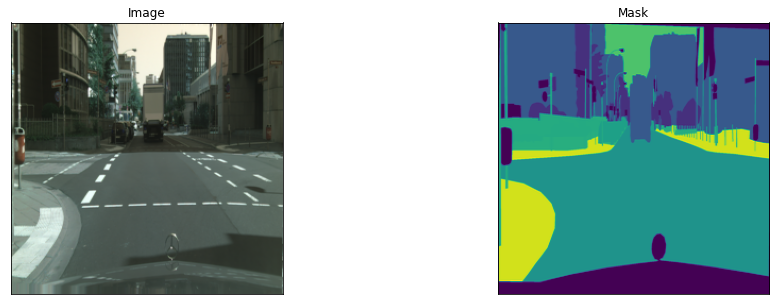

In [94]:
i = 23
image = cv2.imread('./Dval/' + val[i])
image = resize(image, (256, 256))
mask = cv2.imread('./DvalColor/' + valColor[i])
mask = resize(mask, (256, 256))
visualize(image=image, mask=mask[...,0])

In [95]:
from albumentations import (
    Compose, RandomBrightness, RandomContrast, RandomGamma,
    ToFloat, OpticalDistortion, GaussNoise
)
#raw = X[0]
preprocess_input = sm.get_preprocessing(BACKBONE)
preprocessing=get_preprocessing(preprocess_input)
aug = Compose([
    #A.ToFloat(max_value=255)
    #A.VerticalFlip(p=self.prob),
    #A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=self.prob),
    A.RandomContrast(limit=0.5, p=1)
    ]
)
augmented = aug(image=image)
raw = preprocessing(image=augmented['image'])
#raw = preprocessing(image=image)

In [96]:
test = raw['image']

In [97]:
test


array([[[0.62647367, 0.73911548, 0.72831422],
        [0.50457364, 0.55857998, 0.50920278],
        [0.48760021, 0.4906863 , 0.42742169],
        ...,
        [0.16047601, 0.17127728, 0.11264183],
        [0.41507739, 0.41970652, 0.37341535],
        [0.28854823, 0.29780647, 0.27466089]],

       [[0.56475216, 0.6434471 , 0.63418883],
        [0.46136853, 0.478342  , 0.45519638],
        [0.478342  , 0.47988501, 0.44285208],
        ...,
        [0.17282033, 0.18207856, 0.1234431 ],
        [0.3873027 , 0.39347485, 0.35026976],
        [0.26540264, 0.27620393, 0.24842922]],

       [[0.5277192 , 0.59715593, 0.57555342],
        [0.44439515, 0.45828247, 0.42587867],
        [0.43050778, 0.46908376, 0.41816345],
        ...,
        [0.18207856, 0.1913368 , 0.1357874 ],
        [0.35489887, 0.36107105, 0.32095203],
        [0.239171  , 0.24842922, 0.22374061]],

       ...,

       [[0.33946851, 0.40427613, 0.36415711],
        [0.35798496, 0.40427613, 0.36570016],
        [0.34101152, 0

In [98]:
test.shape

(256, 256, 3)

In [99]:
prediction4 = model_p4.predict(test.reshape(1, *test.shape))
np.unique(prediction4[0].argmax(2))

array([0, 2, 3, 4, 5, 6, 7], dtype=int64)

In [100]:
prediction3 = model_p3.predict(test.reshape(1, *test.shape))
np.unique(prediction3[0].argmax(2))

array([0], dtype=int64)

In [101]:
prediction3s = model_p3s.predict(test.reshape(1, *test.shape))
np.unique(prediction3s[0].argmax(2))

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [102]:
predictionp = model_p.predict(test.reshape(1, *test.shape))
np.unique(predictionp[0].argmax(2))

array([0], dtype=int64)

In [103]:
predictionp1 = model_p1.predict(test.reshape(1, *test.shape))
np.unique(predictionp1[0].argmax(2))

array([0, 1, 2, 5, 6, 7], dtype=int64)

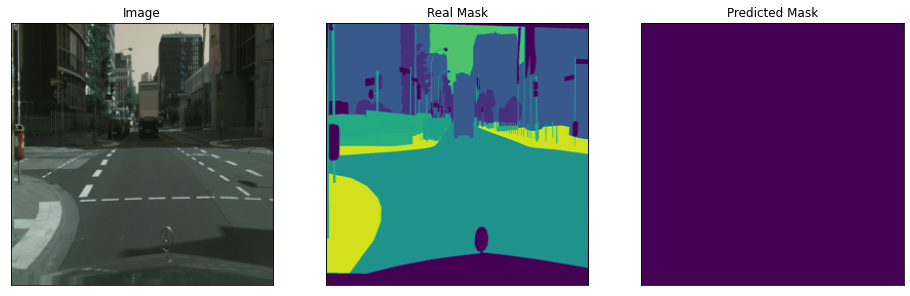

In [104]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=predictionp[0].argmax(2))

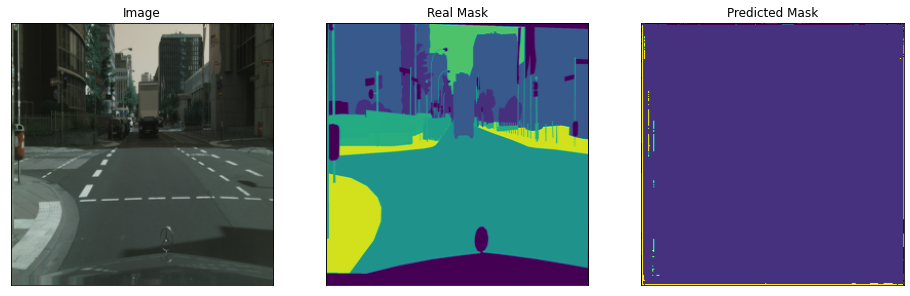

In [105]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=predictionp1[0].argmax(2))

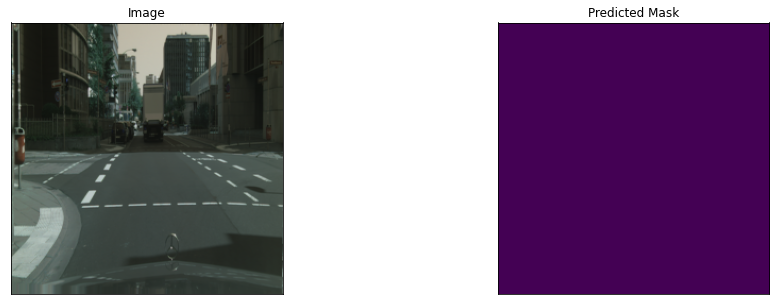

In [106]:
visualize(image=test,  predicted_mask=prediction3[0].argmax(2))

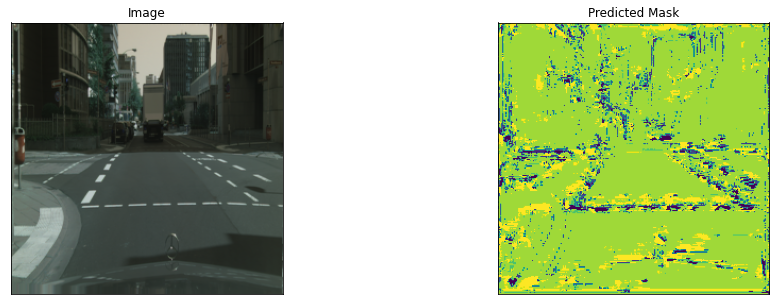

In [107]:
visualize(image=test,  predicted_mask=prediction3s[0].argmax(2))

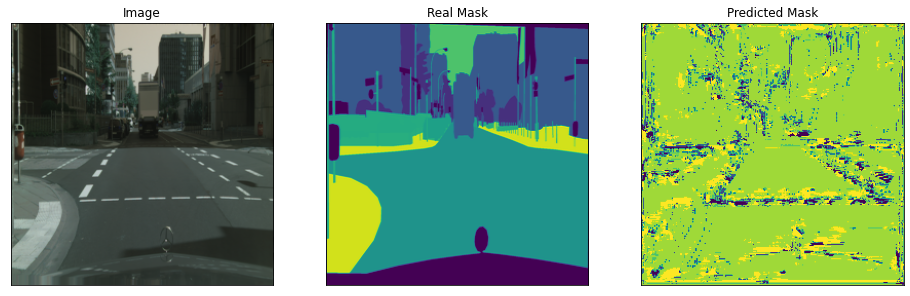

In [108]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction3s[0].argmax(2))

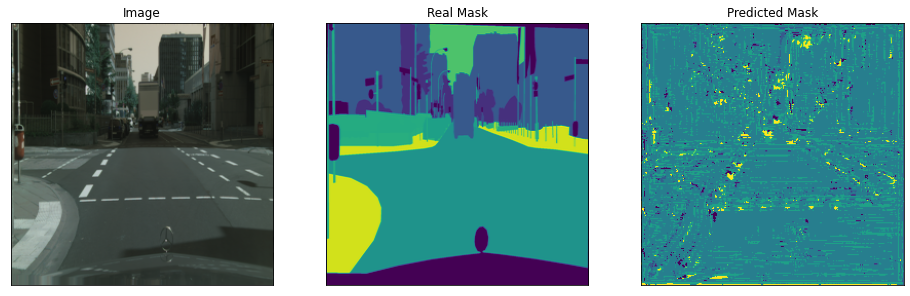

In [109]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction3s[0].argmin(2))

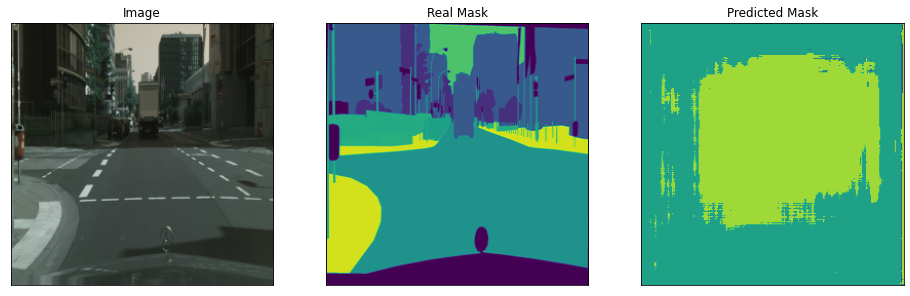

In [110]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction4[0].argmax(2))

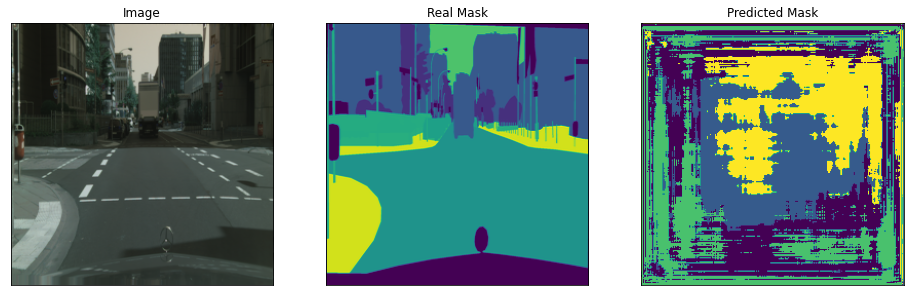

In [111]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction4[0].argmin(2))

In [112]:
!pip install -q pyyaml h5py  

In [113]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model2.save('my_model_.h5')

In [114]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model2.save('model8l.h5')

In [115]:
model_p.save('model8lp.h5')

In [116]:
model_p1.save('model8lp1.h5')

In [117]:
model_p3.save('model8lp3.h5')

In [118]:
model_p3s.save('model8lp3s.h5')

In [119]:
model_p4.save('model8p4.h5')

In [120]:
prediction = model_p3s.predict(test.reshape(1, *test.shape))
np.unique(prediction[0].argmax(2))

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

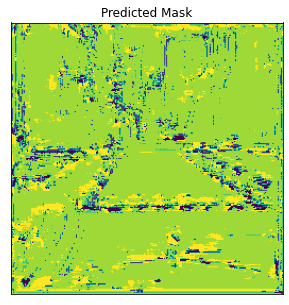

In [121]:
visualize(predicted_mask=prediction[0].argmax(2))

In [122]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model3.save('model83l.h5')

In [123]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model4.save('model84l.h5')

In [124]:
model2.save_weights('Model8wl.h5')

In [125]:
model3.save_weights('Model83wl.h5')

In [126]:
model_p.save_weights('Model81w.h5')

In [127]:
model4.save_weights('Model84wl.h5')